# Imports

In [1]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
from scipy.signal import convolve2d

# Google Drive

In [2]:
from google.colab import drive 
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import os 
GOOGLE_DRIVE_PATH_AFTER_MY_DRIVE = 'Colab Notebooks/Computer Vision/Lab 3'
GOOGLE_DRIVE_PATH = os.path.join('drive', 'My Drive', GOOGLE_DRIVE_PATH_AFTER_MY_DRIVE)
print(os.listdir(GOOGLE_DRIVE_PATH))    #   print files in this directory

['Computer Vision Pre Lab 3.ipynb', 'zebra.jpg', 'messi.jpg']


In [4]:
import sys 
sys.path.append(GOOGLE_DRIVE_PATH)

# Load Image

In [5]:
zebra_img = cv2.imread(GOOGLE_DRIVE_PATH + '/' + 'zebra.jpg')
zebra_img = cv2.cvtColor(zebra_img, cv2.COLOR_BGR2GRAY)

messi_img = cv2.imread(GOOGLE_DRIVE_PATH + '/' + 'messi.jpg')
messi_img = cv2.cvtColor(messi_img, cv2.COLOR_BGR2GRAY)

# General Functions

In [6]:
def print_image(img, title='', cmap='gray', figsize=(12, 8)):
    plt.figure(figsize=figsize)
    plt.imshow(img, cmap=cmap)
    plt.title(title)
    plt.axis("off")
    plt.show()

def normalize_image(img):
    return np.abs(img / np.max(np.abs(img)) * 255)

# Pre-Lab

## Noise Function

In [7]:
def add_guassian_noise(img: np.ndarray, mean: float, sigma: float) -> np.ndarray:
    noise = np.random.normal(loc=mean, scale=sigma, size=img.shape)
    noised_image = img + noise
    return normalize_image(noised_image)

In [8]:
noised_zebra_img1 = add_guassian_noise(zebra_img, 0.1, 0.001)
noised_zebra_img2 = add_guassian_noise(zebra_img, 0, 5)

In [9]:
noised_messi_img1 = add_guassian_noise(messi_img, 0.1, 0.001)
noised_messi_img2 = add_guassian_noise(messi_img, 0, 5)

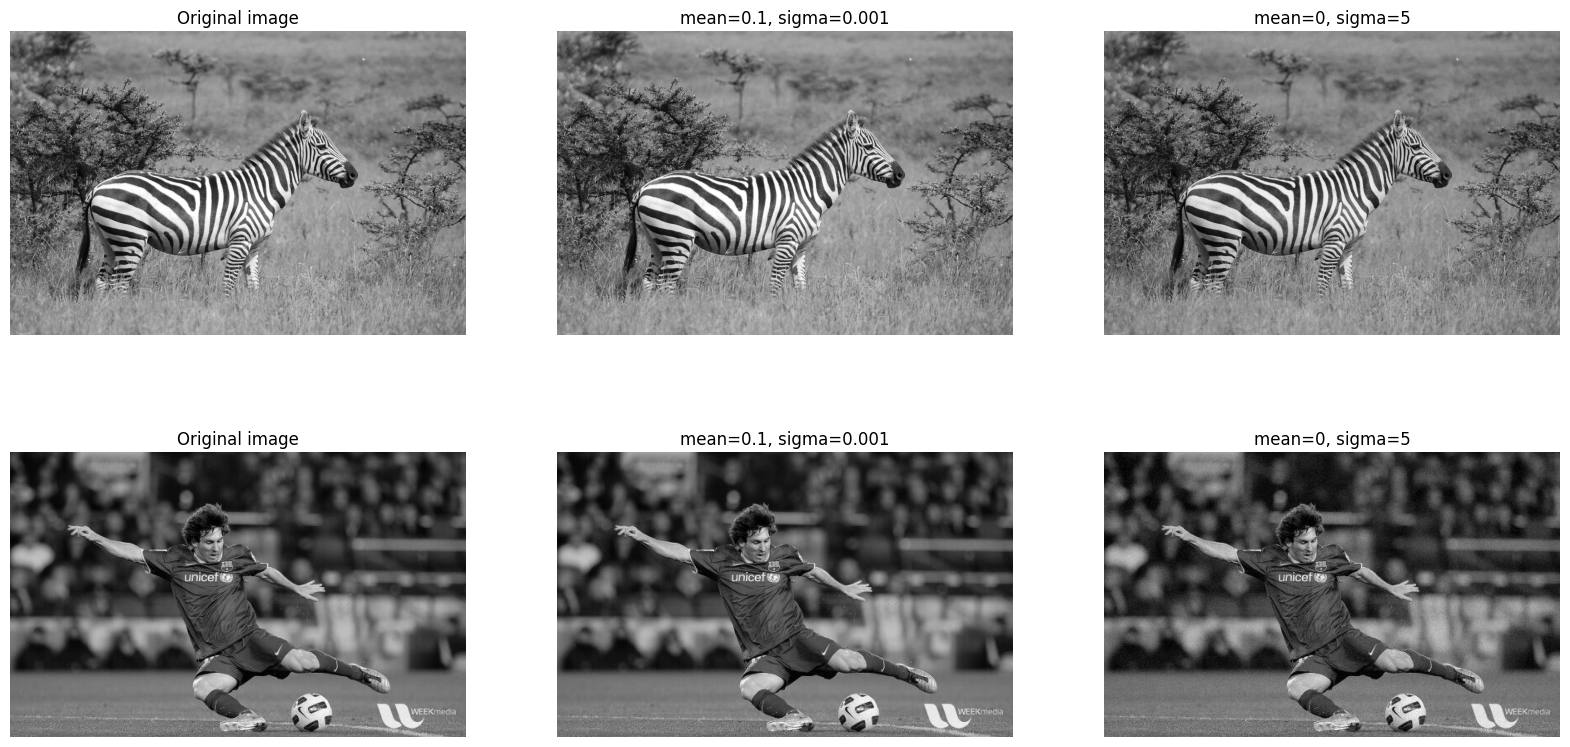

In [10]:
plt.figure(figsize=(20, 10), dpi=100)

plt.subplot(2, 3, 1)
plt.imshow(zebra_img, cmap="gray")
plt.axis("off")
plt.title("Original image")

plt.subplot(2, 3, 2)
plt.imshow(noised_zebra_img1, cmap="gray")
plt.axis("off")
plt.title("mean=0.1, sigma=0.001")

plt.subplot(2, 3, 3)
plt.imshow(noised_zebra_img2, cmap="gray")
plt.axis("off")
plt.title("mean=0, sigma=5")

plt.subplot(2, 3, 4)
plt.imshow(messi_img, cmap="gray")
plt.axis("off")
plt.title("Original image")

plt.subplot(2, 3, 5)
plt.imshow(noised_messi_img1, cmap="gray")
plt.axis("off")
plt.title("mean=0.1, sigma=0.001")

plt.subplot(2, 3, 6)
plt.imshow(noised_messi_img2, cmap="gray")
plt.axis("off")
plt.title("mean=0, sigma=5")

plt.show()

We can see that with `mean=0.1`, `sigma=0.001` the noise in the images is barely visible, while with `mean=0`, `sigma=5` we can see that the noise is much more visible.

## Noise-Filter Function

In [11]:
def remove_noise(img: np.ndarray, filter: np.ndarray) -> np.ndarray:
    clean_img = convolve2d(img, filter, 'same')
    return normalize_image(clean_img)

In [30]:
filter_size = 3
# filter = np.ones([filter_size, filter_size]) / (filter_size ** 2) 

filter = np.array([[1, 2, 1],
                   [2, 4, 2],
                   [1, 2, 1]]) / (filter_size ** 2) 

filtered_messi_img = remove_noise(noised_messi_img2, filter)

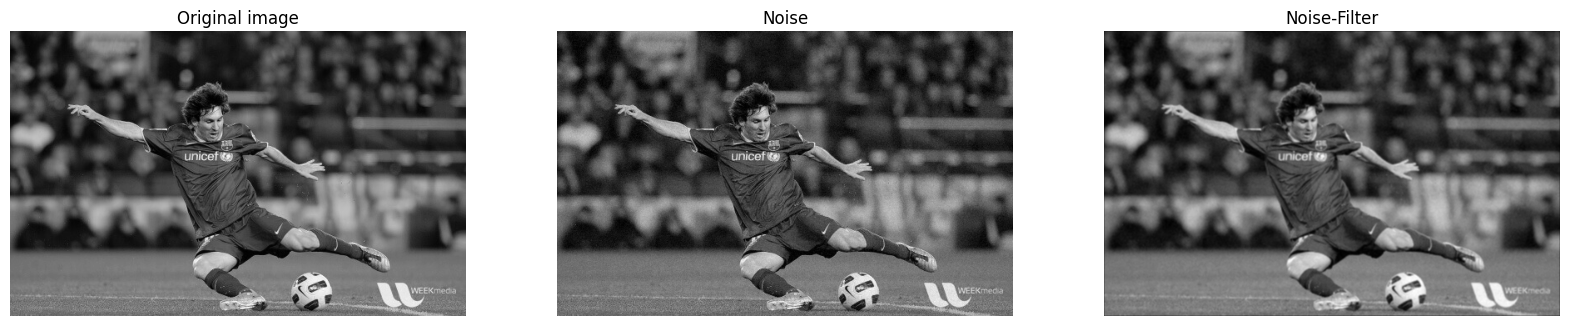

In [31]:
plt.figure(figsize=(20, 10), dpi=100)

plt.subplot(1, 3, 1)
plt.imshow(messi_img, cmap="gray")
plt.axis("off")
plt.title("Original image")

plt.subplot(1, 3, 2)
plt.imshow(noised_messi_img2, cmap="gray")
plt.axis("off")
plt.title("Noise")

plt.subplot(1, 3, 3)
plt.imshow(filtered_messi_img, cmap="gray")
plt.axis("off")
plt.title("Noise-Filter")

plt.show()

## Comparation

### Absulot Difference

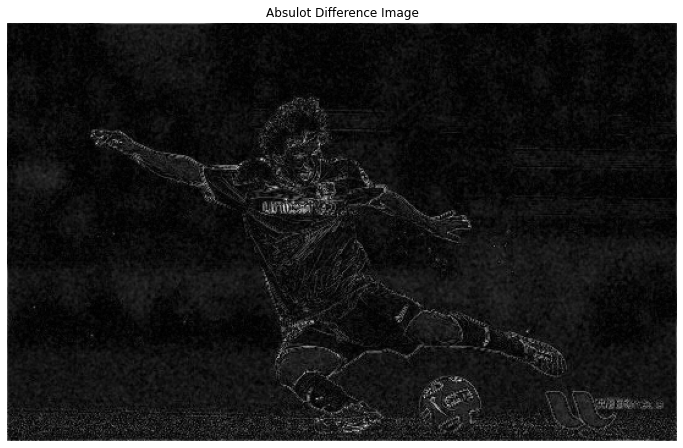

In [32]:
# messi_img = normalize_image(messi_img)
# filtered_messi_img = normalize_image(filtered_messi_img)

diff = np.abs(messi_img - filtered_messi_img)

print_image(diff, 'Absulot Difference Image')

### Histogram

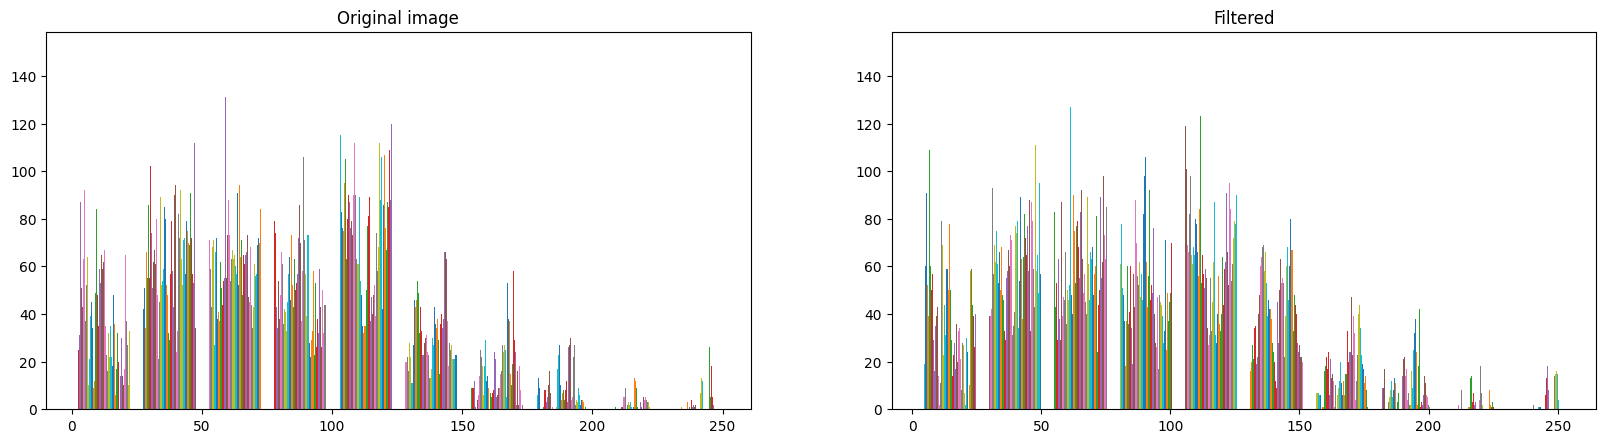

In [33]:
plt.figure(figsize=(20, 5), dpi=100)

plt.subplot(1, 2, 1)
plt.hist(messi_img)
plt.title("Original image")

plt.subplot(1, 2, 2)
plt.hist(filtered_messi_img)
plt.title("Filtered")

plt.show()

### MSE

In [34]:
mse = np.mean(np.square(messi_img - noised_messi_img2))
print('MSE between original and noised images: {}'.format(mse))

mse = np.mean(np.square(messi_img - filtered_messi_img))
print('MSE between original and filtered images: {}'.format(mse))

MSE between original and noised images: 26.152523985049747
MSE between original and filtered images: 70.58650087424398


We can see that the noisy image and the original one have lower MSE errors than the filtered image and the original one.  
It could be because when we filtered out the noise from the noisy image, we calculate for each pixel some kind of average based on its neighbors, this leads to a little bit blurred image.  
In other words, in the filtered image, we have changed probably almost every pixel in the image while in the noisy image, we have only changed particular pixels.

## Rotate Function

In [17]:
def calc_angle(angle):
    rad = np.radians(angle)
    return np.sin(rad), np.cos(rad)

def calc_center(img):
    x = np.round(((img.shape[0] + 1) / 2) - 1)
    y = np.round(((img.shape[1] + 1) / 2) - 1)
    return x, y

def rotate_image(img: np.ndarray, angle: float) -> np.ndarray:
    sin_rad, cos_rad = calc_angle(angle)

    x_center, y_center = calc_center(img)

    new_height  = round(abs(img.shape[0]*cos_rad)+abs(img.shape[1]*sin_rad))+1
    new_width  = round(abs(img.shape[1]*cos_rad)+abs(img.shape[0]*sin_rad))+1

    new_centre_height = round(((new_height+1)/2)-1)        #with respect to the new image
    new_centre_width = round(((new_width+1)/2)-1)          #with respect to the new image


    rotated_img = np.zeros(img.shape)

    height, width = img.shape
    
    for i in range(height):
        for j in range(width):

            x = img.shape[1] - 1 - j - x_center
            y = img.shape[0] - 1 - i - y_center

            x_new = np.round(-x * sin_rad + y * cos_rad)
            y_new = np.round(x * cos_rad + y * sin_rad)

            x_new = int(new_centre_width - x_new)
            y_new = int(new_centre_height - y_new)

            if width > x_new >= 0 and height > y_new >= 0:
                # print(x_new, y_new)
                # print(width, height)
                rotated_img[y_new, x_new] = img[i, j]

    return rotated_img

In [18]:
def calc_angle(angle):
    rad = np.radians(angle)
    return np.sin(rad), np.cos(rad)

def calc_center(img):
    x = img.shape[1] // 2
    y = img.shape[0] // 2
    return x, y

def rotate_image(img: np.ndarray, angle: float) -> np.ndarray:
    sin_rad, cos_rad = calc_angle(angle)

    x_center, y_center = calc_center(img)

    rot_mat = np.array([[cos_rad, -sin_rad],
                        [sin_rad, cos_rad]])

    new_height  = round(abs(img.shape[0]*cos_rad)+abs(img.shape[1]*sin_rad))+1
    new_width  = round(abs(img.shape[1]*cos_rad)+abs(img.shape[0]*sin_rad))+1

    new_centre_height = round(((new_height+1)/2)-1)        #with respect to the new image
    new_centre_width = round(((new_width+1)/2)-1)          #with respect to the new image

    rotated_img = np.zeros(img.shape)

    height, width = img.shape
    
    for i in range(height):
        for j in range(width):

            this_point = np.array([i, j])
            new_point = np.dot(rot_mat, this_point)

            (x_new, y_new) = new_point
            x_new = int(new_centre_width - x_new)
            y_new = int(new_centre_height - y_new)

            # print(this_point)
            # print(y_new, x_new)

            if width > x_new >= 0 and height > y_new >= 0:
                # print(x_new, y_new)
                # print(width, height)
                rotated_img[y_new, x_new] = img[i, j]

    return rotated_img

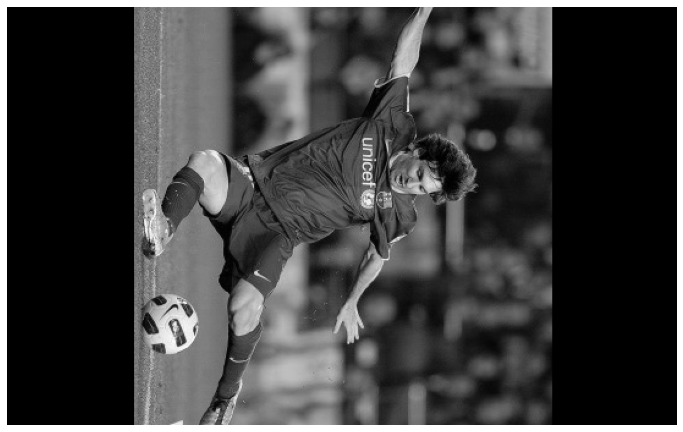

In [22]:
print_image(rotate_image(messi_img, 90))

In [20]:
def calc_angle(y_center, x_center, y, x):
    y_ang = y - y_center
    x_ang = x - x_center
    return np.arctan2(y_ang, x_ang)

def calc_center(img):
    y = img.shape[0] // 2
    x = img.shape[1] // 2
    return y, x

def calc_distance(y_center, x_center, y, x):
    return np.sqrt(np.square(y_center - y) + np.square(x_center - x))

def rotate_image(img: np.ndarray, angle: float) -> np.ndarray:
    y_center, x_center = calc_center(img)

    rotated_img = np.zeros(img.shape)

    for idx_row in range(img.shape[0]):
        for idx_col in range(img.shape[1]):
            ang = calc_angle(y_center, x_center, idx_row, idx_col) - np.radians(angle)
            distance = calc_distance(y_center, x_center, idx_row, idx_col)

            new_y = int(np.round(np.sin(ang) * distance)) + y_center
            new_x = int(np.round(np.cos(ang) * distance)) + x_center

            if new_y <0 or new_y >= img.shape[0] or new_x <0 or new_x >=img.shape[1]:
                continue
            rotated_img[idx_row, idx_col] = img[new_y, new_x]

    return rotated_img

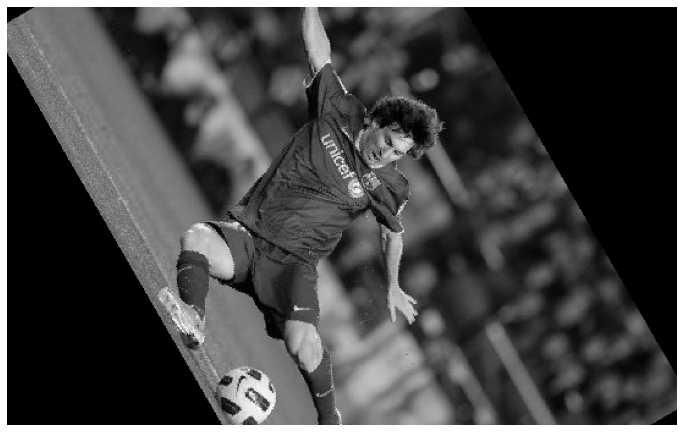

In [21]:
print_image(rotate_image(messi_img, 60))